In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
from scipy.integrate import quad

%matplotlib inline
plt.style.use('classic')

In [3]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [6]:
def costumize_axis(ax, x_title, y_title):
    ax.set_xlabel(x_title, fontsize=24)
    ax.set_ylabel(y_title, fontsize=24)
    ax.tick_params(axis='both', labelsize=18)
    ax.tick_params(axis='both', which='major', length=8)
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.tick_params(axis='both', which='minor', direction='in', length=4)
    return ax

# Energy density evolution, verified with Chandro
|Parameter | Value |
|-:|:-|
|$\tau_0$    | 0.1 |
|$\tau_f$    | 100.1 |
|$\Lambda_0$ | 0.676735026 |
|$\xi_0$     | 100 |
|$\alpha_0$  | 3.9557056e-4 |
|$m$         | 0.2538071 |
|$\eta_s$    | 0.795774715 |
|steps       | 10001 |

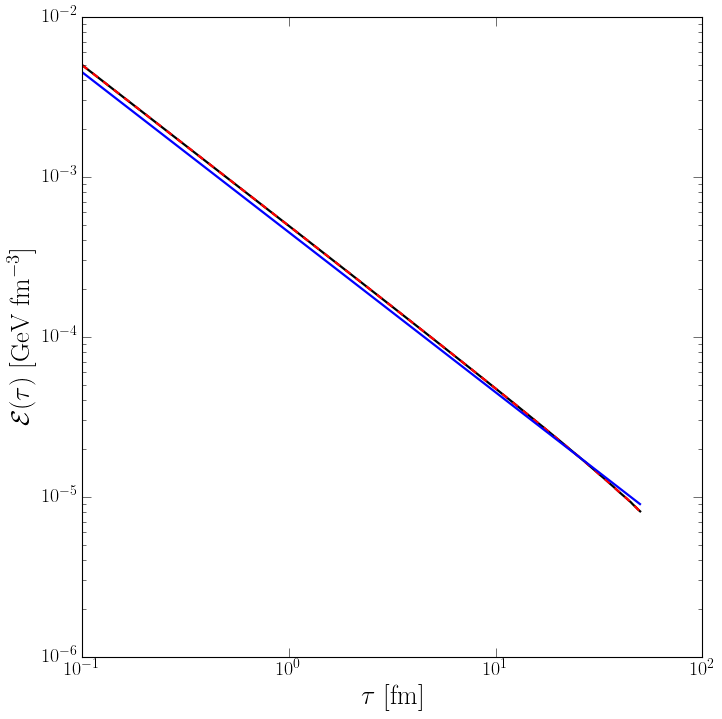

In [358]:
n = 51
tau = np.zeros(n)
old_e = np.zeros(n)
new_e = np.zeros(n)
xx = np.linspace(0.1, 50, 100)

with open('output/e_density_comparison.dat', 'r') as file:
    lines = file.readlines()
    for j, line in enumerate(lines):
        data = line.split()
        tau[j], old_e[j], new_e[j] = data[0], data[1], data[2]

fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')

ax.loglog(tau, old_e, lw=2, color='black')
ax.loglog(tau, new_e, lw=2, color='red', ls='dashed')
ax.loglog(xx, 4.5e-4 / xx, lw=2, color='blue')
costumize_axis(ax, x_title=r"$\tau$ [fm]", y_title=r"$\mathcal{E}(\tau)$ [GeV fm$^{-3}$]")
ax.set_yscale('log')

# $\theta$ integrated distribution function
|Parameter | Value |
|-:|:-|
|$\tau_0$    | 0.1 |
|$\tau_f$    | 100.1 |
|$\Lambda_0$ | 0.676735026 |
|$\xi_0$     | 100 |
|$\alpha_0$  | 1.0 |
|$m$         | 0.2538071 |
|$\eta_s$    | 0.795774715 |
|steps       | 10001 |


In [8]:
def output_integrals(x, y, fit_func, fit_params):
    integral_1 = np.sum(y) * x
    integral_2 = quad(fit_func, 0, 3.0, args=fit_params)[0]
    print(integral_1, integral_2,np.fabs(1 - integral_1 / integral_2))
    return

def to_tuple(arr):
    return tuple(a for a in arr)

def return_temperature(tau, T, current_time):
    index = np.where(tau == current_time)
    return T[index]

In [10]:
with open('output/etas0.2_new_nonconformal.dat', 'r') as file:
    lines = file.readlines()
    tau  =  np.array([float(line.split()[0]) for line in lines])
    inv_T = np.array([float(line.split()[1]) for line in lines])
    Temp  = np.array([float(line.split()[2]) for line in lines])

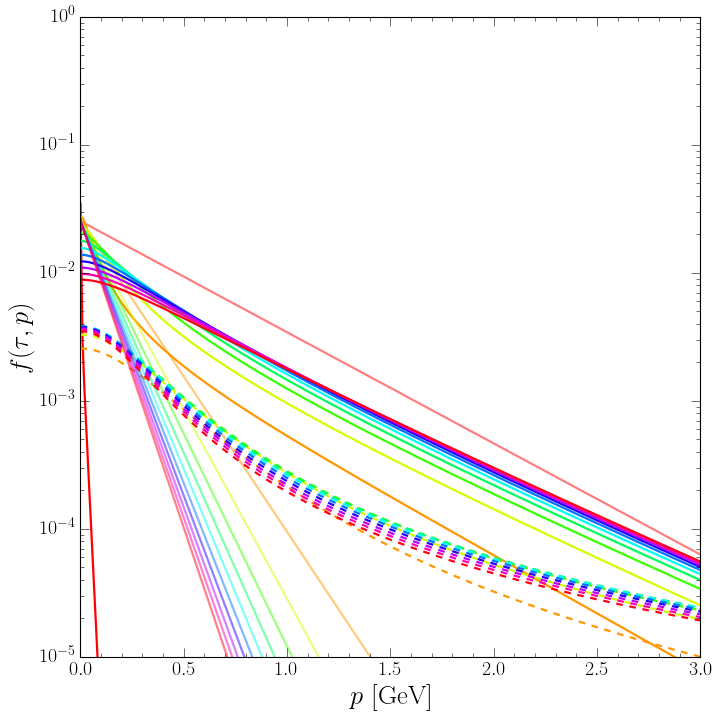

In [11]:
n = 301
suffixes = [x+0.1 for x in range(0,51,5)]
pdata = np.zeros((len(suffixes), n))
fdata = np.zeros((len(suffixes), n))
sdata = np.zeros((len(suffixes), n))
for i, val in enumerate(suffixes):
    with open(f'output/extact_solution_tuple_{val}.dat', 'r') as file:
        lines = file.readlines()
        pdata[i] = np.array([float(line.split()[0]) for line in lines])
        fdata[i] = np.array([float(line.split()[1]) for line in lines])
        sdata[i] = np.array([float(line.split()[2]) for line in lines])
        
nplots = len(suffixes)
cmap = get_cmap(nplots)
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('white')
costumize_axis(ax, r'$p$ [GeV]', r'$f(\tau, p)$')
ax.set_ylim(bottom=1e-5)
for i in range(nplots):
    ax.semilogy(pdata[i], fdata[i], lw=2, color=cmap(i))
    ax.semilogy(pdata[i], sdata[i], lw=2, color=cmap(i), ls='dashed')
    T = return_temperature(tau, Temp, suffixes[i])
    ax.semilogy(pdata[i], np.exp(-pdata[i] / T)/(4.0 * np.pi **2), lw=2, color=cmap(i), alpha=0.5)